# KDE: Kernel Density Function 

In [10]:
df = pd.read_excel('/Users/negin/Desktop/UVA/projects with Prof. Baek/Johns Hopkins University/Phong_Work/data/vaso_lock_kate1.xlsx')
df

,Rows,Prickles,Type,Length,OD,ID,WT,DOD,Max_Force
0,1,4,0.0,14.35,3.17,2.65,0.890,3.5,0.700
1,1,15,0.0,15.68,5.89,4.90,0.960,5.5,0.700
2,1,3,0.0,13.11,3.30,2.34,0.740,3.5,0.800
3,1,3,0.0,15.93,2.87,2.67,0.890,3.5,0.810
4,1,4,0.0,16.72,4.07,2.75,0.880,3.5,0.990
...,...,...,...,...,...,...,...,...,...
200,3,5,NaN,15.64,6.05,5.69,0.180,6.0,2.947
201,3,5,NaN,18.16,6.49,4.17,1.160,6.0,12.373
202,3,6,NaN,16.99,5.97,4.62,0.675,6.0,4.194
203,3,6,NaN,16.89,5.96,4.27,0.845,6.0,3.485


## Gaussian KDE

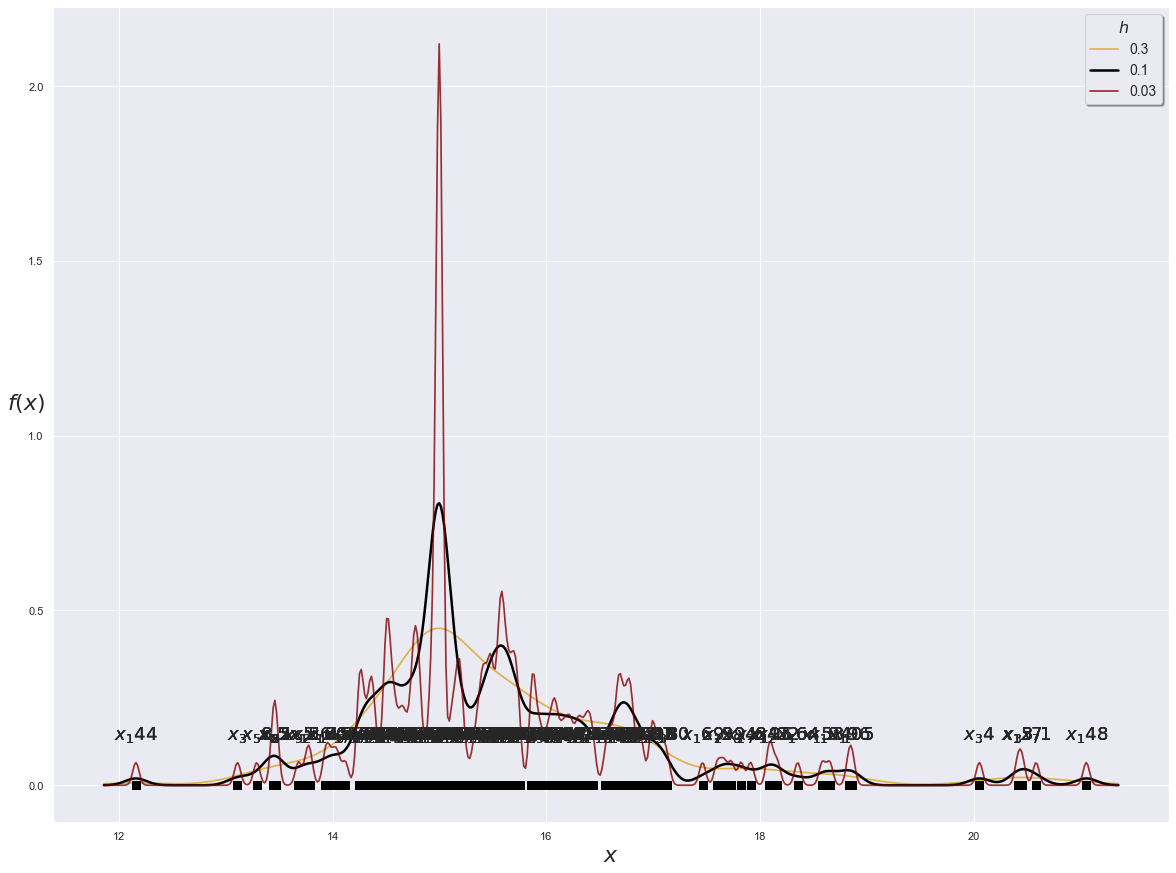

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# the Kernel function
def K(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

# Read the dataset from Excel
df = pd.read_excel('/Users/negin/Desktop/UVA/projects with Prof. Baek/Johns Hopkins University/Phong_Work/data/vaso_lock_kate1.xlsx')

# Drop the 'Type' feature
df.drop(columns=['Type'], inplace=True)

# Extract the 'Length' column as the dataset
dataset = df['Length'].values

# x-value range for plotting KDEs
x_range = np.linspace(dataset.min()-0.3, dataset.max()+0.3, num=600)

# bandwith values for experimentation
H = [0.3, 0.1, 0.03]
n_samples = dataset.size

# line properties for different bandwith values
color_list = ['goldenrod', 'black', 'maroon']
alpha_list = [0.8, 1, 0.8]
width_list = [1.7,2.5,1.7]

plt.figure(figsize=(20,15))
# iterate over bandwith values
for h, color, alpha, width in zip(H, color_list, alpha_list, width_list):
    total_sum = 0
    # iterate over datapoints
    for i, xi in enumerate(dataset):
        total_sum += K((x_range - xi) / h)
        plt.annotate(r'$x_{}$'.format(i+1),
                     xy=[xi, 0.13],
                     horizontalalignment='center',
                     fontsize=18,
                    )
    y_range = total_sum/(h*n_samples)
    plt.plot(x_range, y_range, 
             color=color, alpha=alpha, linewidth=width, 
             label=f'{h}')

    plt.plot(dataset, np.zeros_like(dataset) , 's', 
             markersize=8, color='black')
    
plt.xlabel('$x$', fontsize=22)
plt.ylabel('$f(x)$', fontsize=22, rotation='horizontal', labelpad=2)
plt.legend(fontsize=14, shadow=True, title='$h$', title_fontsize=16)
plt.show()


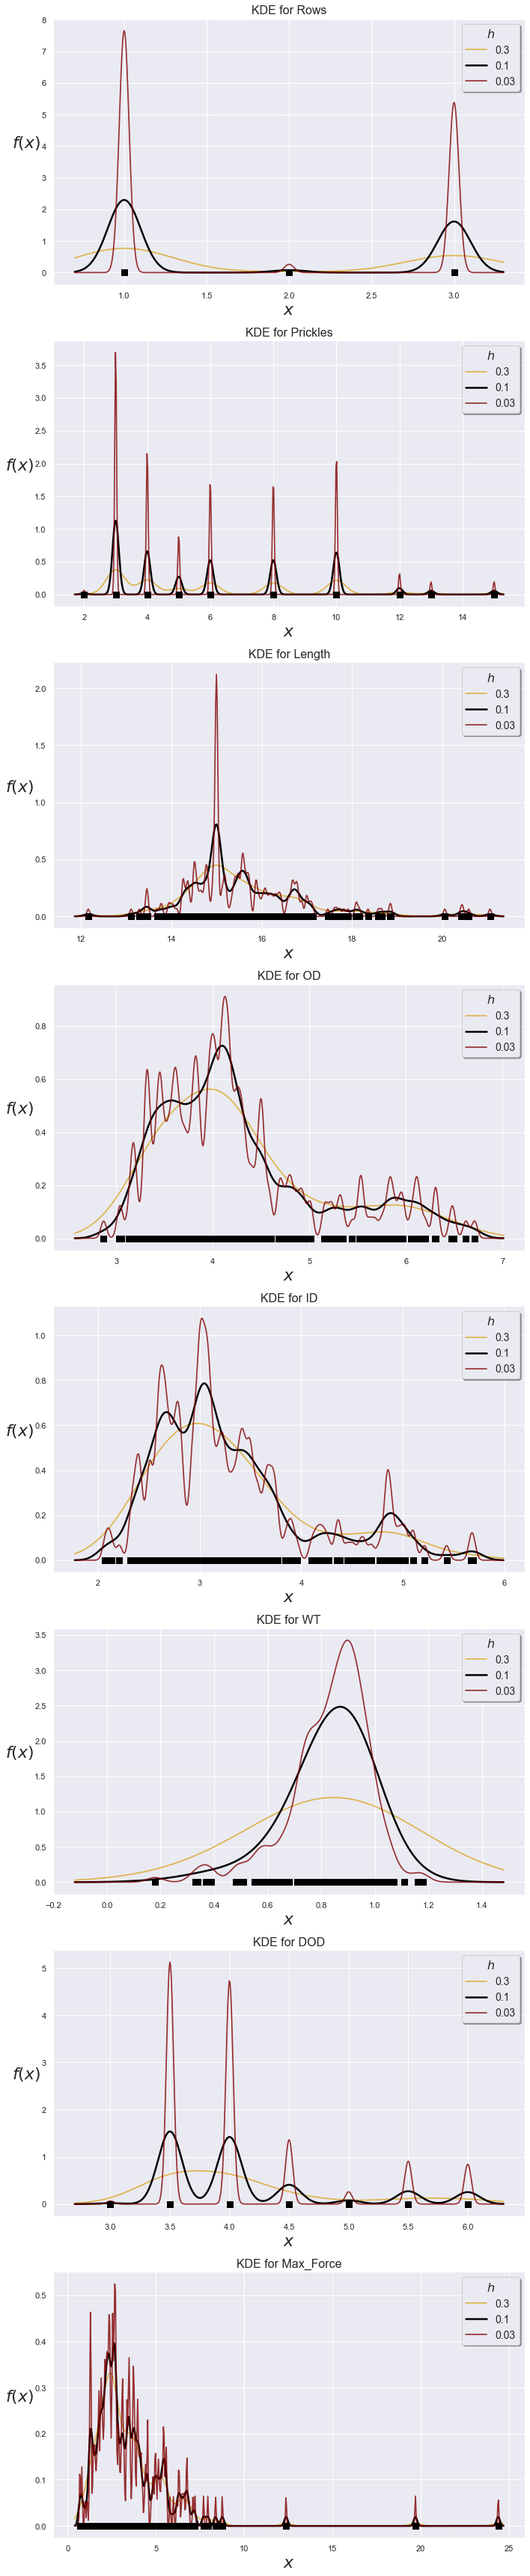

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# the Kernel function using Gaussian kernel
def K(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

# Read the dataset from Excel
df = pd.read_excel('/Users/negin/Desktop/UVA/projects with Prof. Baek/Johns Hopkins University/Phong_Work/data/vaso_lock_kate1.xlsx')

# Drop the 'Type' feature
df.drop(columns=['Type'], inplace=True)

# Select features for plotting
features = df.columns

# Set up subplots
num_features = len(features)
fig, axes = plt.subplots(num_features, 1, figsize=(10, 6*num_features))

# bandwidth values for experimentation
H = [0.3, 0.1, 0.03]
n_samples = len(df)

# line properties for different bandwidth values
color_list = ['goldenrod', 'black', 'maroon']
alpha_list = [0.8, 1, 0.8]
width_list = [1.7, 2.5, 1.7]

for j, feature in enumerate(features):
    ax = axes[j] if num_features > 1 else axes
    
    # Extract the feature data
    dataset = df[feature].values
    x_range = np.linspace(dataset.min()-0.3, dataset.max()+0.3, num=600)
    
    for h, color, alpha, width in zip(H, color_list, alpha_list, width_list):
        total_sum = 0
        for i, xi in enumerate(dataset):
            total_sum += K((x_range - xi) / h)
        y_range = total_sum/(h*n_samples)
        ax.plot(x_range, y_range, 
                 color=color, alpha=alpha, linewidth=width, 
                 label=f'{h}')

        ax.plot(dataset, np.zeros_like(dataset) , 's', 
                 markersize=8, color='black')

    ax.set_xlabel('$x$', fontsize=22)
    ax.set_ylabel('$f(x)$', fontsize=22, rotation='horizontal', labelpad=20)
    ax.legend(fontsize=14, shadow=True, title='$h$', title_fontsize=16)
    ax.set_title(f'KDE for {feature}', fontsize=16)

plt.tight_layout()

# Save the figure as a PNG
plt.savefig('kde_plots_gaussian.png')

plt.show()


## Cosin KDE

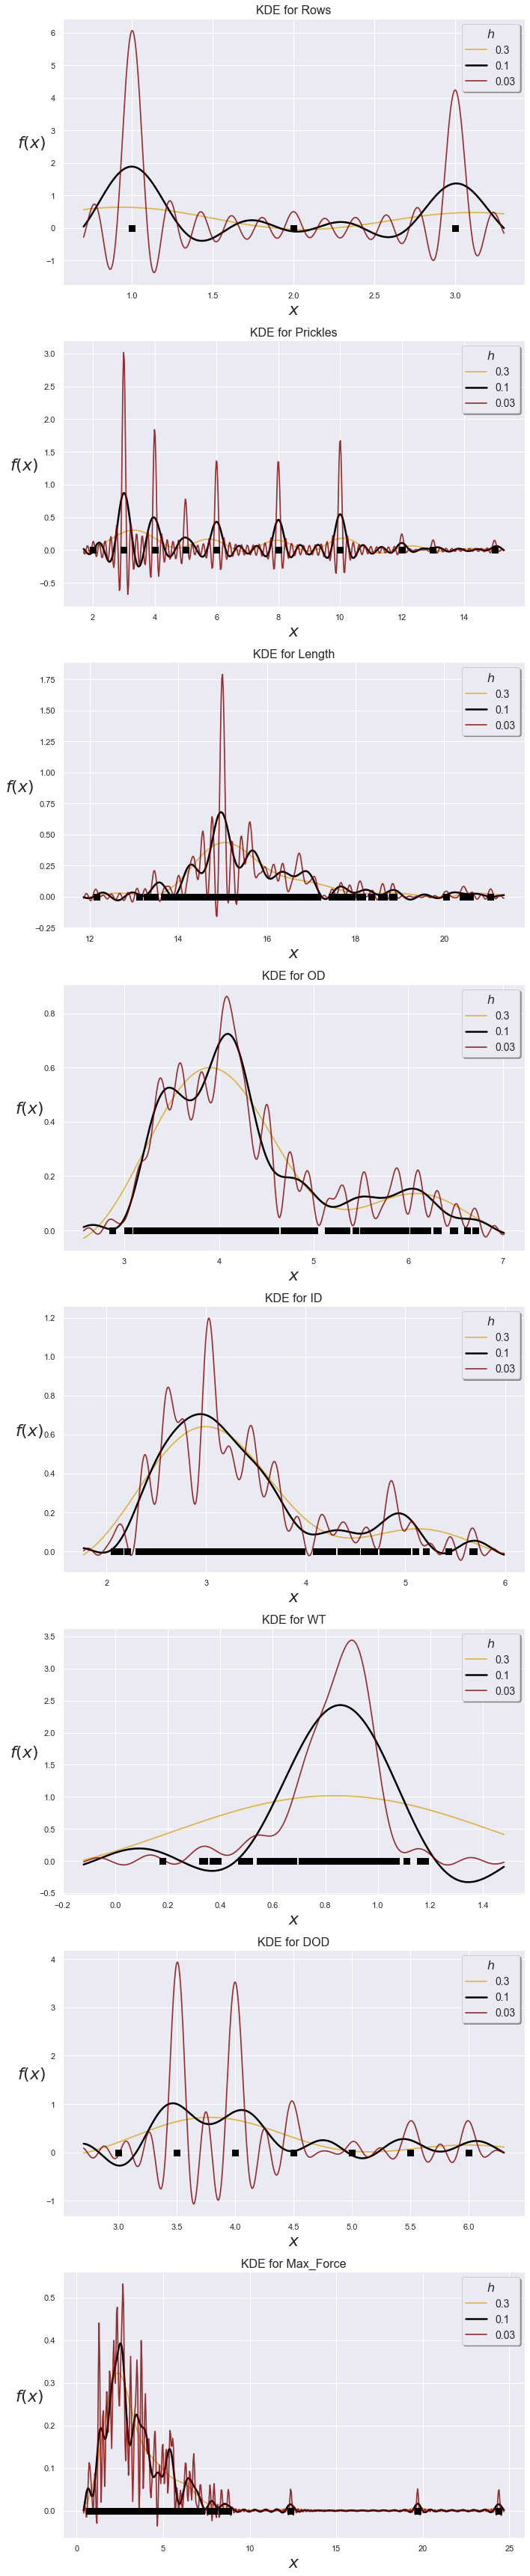

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# the Kernel function using cosine kernel
def K(x):
    return (1 / np.pi) * (np.sin(x) / x)

# Read the dataset from Excel
df = pd.read_excel('/Users/negin/Desktop/UVA/projects with Prof. Baek/Johns Hopkins University/Phong_Work/data/vaso_lock_kate1.xlsx')

# Drop the 'Type' feature
df.drop(columns=['Type'], inplace=True)

# Select features for plotting
features = df.columns

# Set up subplots
num_features = len(features)
fig, axes = plt.subplots(num_features, 1, figsize=(10, 6*num_features))

# bandwith values for experimentation
H = [0.3, 0.1, 0.03]
n_samples = len(df)

# line properties for different bandwith values
color_list = ['goldenrod', 'black', 'maroon']
alpha_list = [0.8, 1, 0.8]
width_list = [1.7,2.5,1.7]

for j, feature in enumerate(features):
    # Extract the feature data
    dataset = df[feature].values
    x_range = np.linspace(dataset.min()-0.3, dataset.max()+0.3, num=600)
    
    ax = axes[j] if num_features > 1 else axes
    
    for h, color, alpha, width in zip(H, color_list, alpha_list, width_list):
        total_sum = 0
        for i, xi in enumerate(dataset):
            total_sum += K((x_range - xi) / h)
        y_range = total_sum/(h*n_samples)
        ax.plot(x_range, y_range, 
                 color=color, alpha=alpha, linewidth=width, 
                 label=f'{h}')

        ax.plot(dataset, np.zeros_like(dataset) , 's', 
                 markersize=8, color='black')

    ax.set_xlabel('$x$', fontsize=22)
    ax.set_ylabel('$f(x)$', fontsize=22, rotation='horizontal', labelpad=20)
    ax.legend(fontsize=14, shadow=True, title='$h$', title_fontsize=16)
    ax.set_title(f'KDE for {feature}', fontsize=16)

plt.tight_layout()
plt.show()


In [18]:
# Save the figure as PNG
plt.savefig('all_kde_plots1.png', bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>

## Silverman's rule of thumb (ROT):

In [16]:
# Silverman's rule for bandwidth selection
def silverman_bandwidth(data):
    n = len(data)
    std_dev = np.std(data)
    return (4 * (std_dev ** 5) / (3 * n)) ** (1/5)

# Example usage:
bandwidth = silverman_bandwidth(dataset)
print("Silverman's bandwidth:", bandwidth)


Silverman's bandwidth: 0.26921718387928867


## Cosine KDE after ROT:

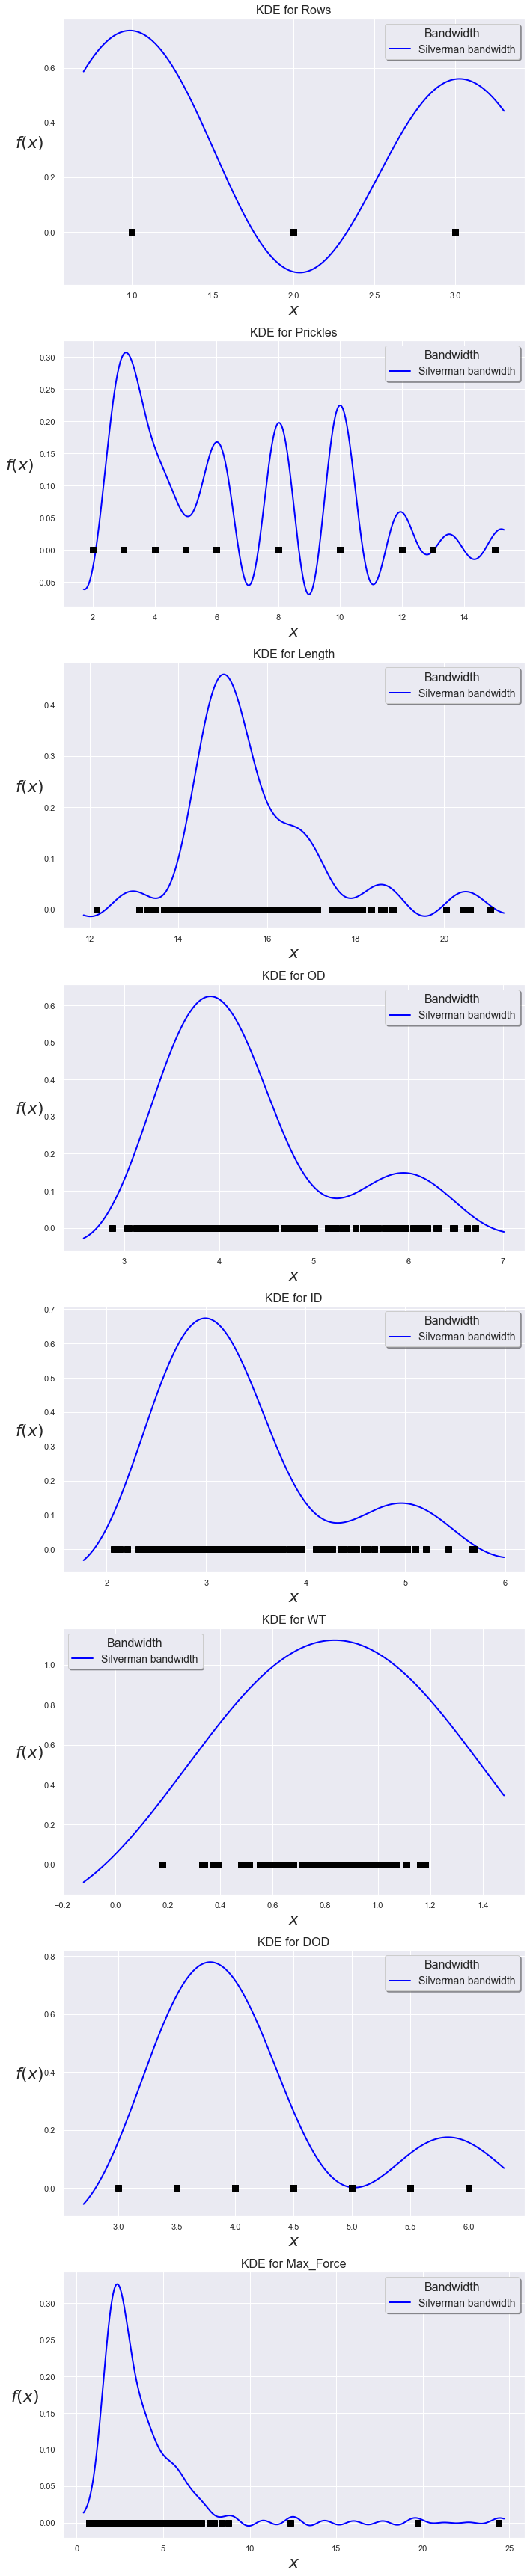

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# the Kernel function using cosine kernel
def K(x):
    return (1 / np.pi) * (np.sin(x) / x)

# Read the dataset from Excel
df = pd.read_excel('/Users/negin/Desktop/UVA/projects with Prof. Baek/Johns Hopkins University/Phong_Work/data/vaso_lock_kate1.xlsx')

# Drop the 'Type' feature
df.drop(columns=['Type'], inplace=True)

# Select features for plotting
features = df.columns

# Set up subplots
num_features = len(features)
fig, axes = plt.subplots(num_features, 1, figsize=(10, 6*num_features))

# bandwidth value from Silverman's rule
bandwidth = 0.26921718387928867

for j, feature in enumerate(features):
    # Extract the feature data
    dataset = df[feature].values
    x_range = np.linspace(dataset.min()-0.3, dataset.max()+0.3, num=600)
    
    ax = axes[j] if num_features > 1 else axes
    
    total_sum = 0
    for i, xi in enumerate(dataset):
        total_sum += K((x_range - xi) / bandwidth)
    y_range = total_sum/(bandwidth*len(dataset))
    ax.plot(x_range, y_range, color='blue', linewidth=2, label=f'Silverman bandwidth')

    ax.plot(dataset, np.zeros_like(dataset) , 's', markersize=8, color='black')

    ax.set_xlabel('$x$', fontsize=22)
    ax.set_ylabel('$f(x)$', fontsize=22, rotation='horizontal', labelpad=20)
    ax.legend(fontsize=14, shadow=True, title='Bandwidth', title_fontsize=16)
    ax.set_title(f'KDE for {feature}', fontsize=16)

plt.tight_layout()

# Save the figure as PNG
plt.savefig('all_kde_plots.png', bbox_inches='tight')
plt.show()
